In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random
import re
import seaborn as sns
from sklearn.metrics import confusion_matrix
from zipfile import ZipFile
from glob import glob
from google.colab import drive
from keras.models import Sequential
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras import datasets, layers, optimizers
from tensorflow.keras.layers import Dropout,GlobalAveragePooling2D, Dense
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adagrad
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import auc
from tensorflow.keras.applications import MobileNetV2

"""# Extract the images and clasiffing into 3 categories
# (healthy, virus, bacterial)
"""

drive.mount('/content/drive')

file_name = '/content/drive/My Drive/Final Project DL & ML/chest-xray.zip'

with ZipFile(file_name, 'r') as zip_file:
  zip_file.extractall()  # Extract all contents of the ZIP file.
  print('Done')

train_path = '/content/chest_xray/chest_xray/train'
val_path = '/content/chest_xray/chest_xray/val'
test_path = '/content/chest_xray/chest_xray/test'

pre_path = '/content/chest_xray/chest_xray/'

# Define paths for different sets and classes.
train_normal_dir = pre_path + 'train/NORMAL/'
train_pneu_dir = pre_path + 'train/PNEUMONIA/'

test_normal_dir = pre_path + 'test/NORMAL/'
test_pneu_dir = pre_path + 'test/PNEUMONIA/'

val_normal_dir = pre_path + 'val/NORMAL/'
val_pneu_dir = pre_path + 'val/PNEUMONIA/'


#initiazing the healthy, bacteria and virus cases of the images
virus = [] #1493 images total
bacteria = [] #2780 images total
healthy = [] #1583 images total

healthy += glob(train_normal_dir + '*jpeg')

#By using Regular Expressions we sorting the cases properly
#0- healthy, 1- virus case, 2 - bacteria case
for i in os.listdir(train_pneu_dir):
  if(re.search("virus.*jpeg", i)):
      virus.append([train_pneu_dir+i,1])
  elif(re.search("bacteria.*jpeg", i)):
      bacteria.append([train_pneu_dir+i,2])

healthy += glob(test_normal_dir + '*jpeg')

for i in os.listdir(test_pneu_dir):
  if(re.search("virus.*jpeg", i)):
      virus.append([test_pneu_dir+i,1])
  elif(re.search("bacteria.*jpeg", i)):
      bacteria.append([test_pneu_dir+i,2])

healthy += glob(val_normal_dir + '*jpeg')

for i in os.listdir(val_pneu_dir):
  if(re.search("virus.*jpeg", i)):
      virus.append([val_pneu_dir+i,1])
  elif(re.search("bacteria.*jpeg", i)):
      bacteria.append([val_pneu_dir+i,2])

for i in range(len(healthy)):
  healthy[i]=(healthy[i],0)

for lst in [healthy,virus,bacteria]:
  random.shuffle(lst)


"""# Creating the test, train and validation sets"""
# # 15% validation(878) and 20% test sets(1172), 65% train set from all data(3806)
# # Splitting data into train, validation, and test sets

val = virus[:250] + bacteria[:450] + healthy[:178]
test = virus[250:500] + bacteria[450:900] + healthy[178:650]
train = virus[500:] + bacteria[900:] + healthy[650:]

def NormalPixels(data):
    # Normalize the pixels on every image and label
    normal = []
    labels = []

    for im_path,label in data:
        # Assigning labels based on the type of pneumonia
        if label == 2:
            labels.append(1)  # Label 1 for bacteria pneumonia
        else:
            labels.append(label)

       # Open the image and convert it to RGB
        image = Image.open(im_path).convert("RGB")

        # Resize the image to 180x180
        resized_image = image.resize((180, 180))

        # Convert the resized image to a NumPy array
        image_array = np.array(resized_image)

        # Normalize the pixel values
        im_normal = image_array / 255.0

        normal.append(im_normal)

    return np.array(normal), np.array(labels)

def CreatingtVal(val):
    val_norm, val_label = NormalPixels(val)  # Normalize validation data
    return val_norm, val_label

def CreatingtTrain(train):
    train_norm, train_label = NormalPixels(train)  # Normalize training data
    return train_norm, train_label

def CreatingtTest(test):
    test_norm, test_label = NormalPixels(test)  # Normalize test data
    return test_norm, test_label

val_norm, val_label = CreatingtVal(val)
train_norm, train_label = CreatingtTrain(train)
test_norm, test_label = CreatingtTest(test)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Done


<ipython-input-37-bf62d0fb97e3>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(180, 180, 3), include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=None)


Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - accuracy: 0.7443 - loss: 0.5795 - val_accuracy: 0.7973 - val_loss: 0.5078
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7578 - loss: 0.5522 - val_accuracy: 0.7973 - val_loss: 0.4981
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7510 - loss: 0.5562 - val_accuracy: 0.7973 - val_loss: 0.5604
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7532 - loss: 0.5459 - val_accuracy: 0.7973 - val_loss: 0.4913
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7494 - loss: 0.5257 - val_accuracy: 0.7973 - val_loss: 0.5220
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7583 - loss: 0.4967 - val_accuracy: 0.8007 - val_loss: 0.4299
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7598 - loss: 0.4784 - val_accuracy: 0.7699 - val_loss: 0.5087
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7831 - loss: 0.4708 - val_accurac

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_37 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide_18 (TrueDivide)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract_18 (Subtract)               │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 6, 6, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 6, 6, 32)            │         368,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 3, 3, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 1, 1, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_18          │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,180,292 (12.13 MB)

 Trainable params: 461,153 (1.76 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 461,155 (1.76 MB)

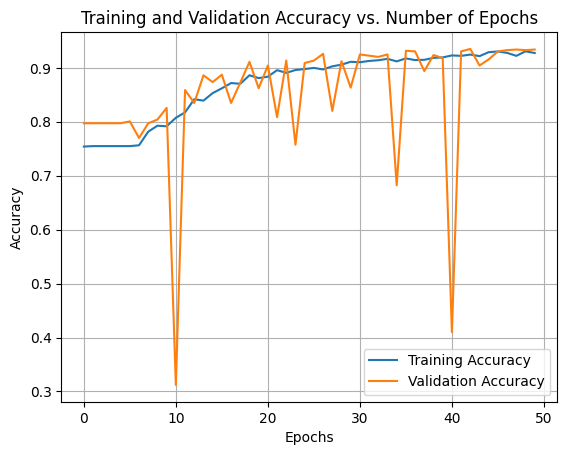

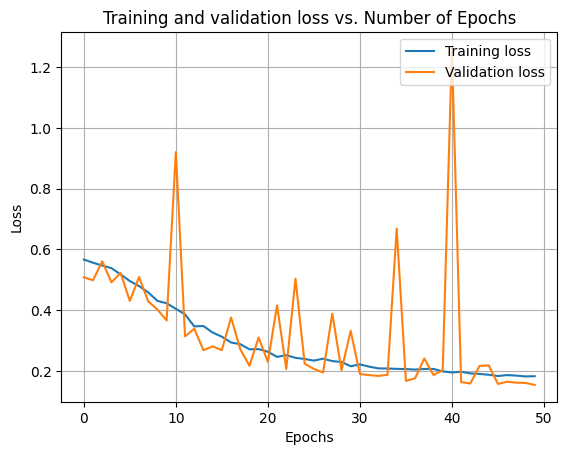

In [37]:
"""# Building the Transfer Learning model"""
base_model = tf.keras.applications.MobileNetV2(input_shape=(180, 180, 3), include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=None)
base_model.trainable = False

preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')

inputs = tf.keras.Input(shape=(180, 180, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)

# Additional layers
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.15)(x)
outputs = prediction_layer(x)

transfer_learning = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.01
transfer_learning.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=base_learning_rate,weight_decay = 1e-6 ),
                           loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                           metrics=['accuracy'])

history = transfer_learning.fit(train_norm, train_label, epochs=50, batch_size=20,
                                validation_data=(val_norm, val_label), verbose=1)

transfer_learning.summary()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

plt.clf() # clear figure
plt.plot(history.history['loss'], label='Training loss')

plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')
plt.show()

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9480 - loss: 0.1353

Test accuracy:  0.9155290126800537

Test loss:  0.22931496798992157
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step


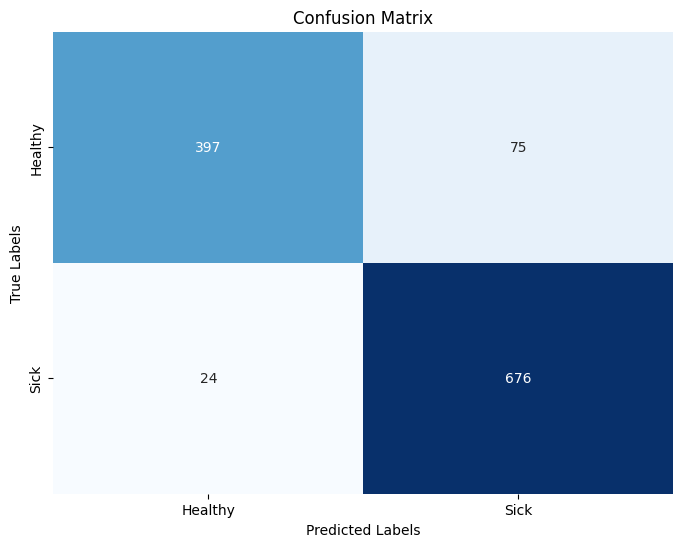

In [38]:
# Evaluate the model on the test set
test_loss, test_acc = transfer_learning.evaluate(test_norm, test_label, verbose=1)
print("\nTest accuracy: ", test_acc)
print("\nTest loss: ", test_loss)

# Get the predicted probabilities for the test set
predicted_probabilities = transfer_learning.predict(test_norm)

# Convert probabilities to binary predictions (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_label, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
# Set labels for the axes
plt.xticks(ticks=[0.5, 1.5], labels=['Healthy', 'Sick'])
plt.yticks(ticks=[0.5, 1.5], labels=['Healthy', 'Sick'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()